In [12]:
# library
from sklearn.datasets import make_blobs
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
%matplotlib inline
from numpy.random import *
from sklearn import svm
import math

In [13]:
#変数
#分割数

gamma_list = np.logspace(-3, 1, 5)
nu_list = np.logspace(-3,-0.5,5)

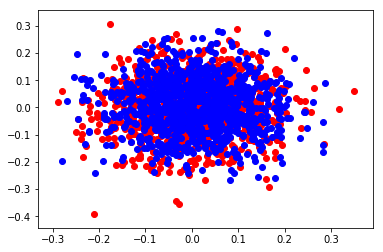

In [14]:
#テストデータの作成
x_random = []
y_random = []

x_test = []
y_test = []

for i in range(1000):
    x_test.append(normal(0,0.1))
    y_test.append(normal(0,0.1))
xy_test = np.c_[x_test, y_test]

for i in range(1000):
    x_random.append(normal(0,0.1))
    y_random.append(normal(0,0.1))
xy_random = np.c_[x_random, y_random]

plt.scatter(xy_random[:, 0], xy_random[:, 1], color='red')
plt.scatter(xy_test[:, 0], xy_test[:, 1], color='blue')

In [15]:
gamma = ([0.001, 0.01, 0.1, 1, 10])
nu = ([0.001, 0.005, 0.01, 0.05, 0.1, 0.5])
cv = 5
divide = len(xy_random)/cv
closs_val = len(xy_random)

math.sqrt(xy_random[0,0]**2 + xy_random[0,1]**2)

0.18127358852623124

In [16]:
label = []
test_label = []
for i in range(1000):
    if (math.sqrt(xy_random[i,0]**2 + xy_random[i,1]**2)) > 0.3:
        label.append(-1)
    else:
        label.append(1)
        
for j in range(1000):
    if(math.sqrt(xy_test[j,0]**2 + xy_test[j,1]**2)) > 0.3:
        test_label.append(-1)
    else:
        test_label.append(1)

In [17]:
test1,test2,test3,test4,test5 = [],[],[],[],[]
fold1,fold2,fold3,fold4,fold5 = np.array_split(xy_random,cv)
test1.extend(fold2)
test1.extend(fold3)
test1.extend(fold4)
test1.extend(fold5)

test2.extend(fold1)
test2.extend(fold3)
test2.extend(fold4)
test2.extend(fold5)

test3.extend(fold1)
test3.extend(fold2)
test3.extend(fold4)
test3.extend(fold5)

test4.extend(fold1)
test4.extend(fold2)
test4.extend(fold3)
test4.extend(fold5)

In [17]:
test5.extend(fold1)
test5.extend(fold2)
test5.extend(fold3)
test5.extend(fold4)
label1,label2,label3,label4,label5 = np.array_split(label,cv)

In [20]:
best_average_acc = 0
for gamma in gamma_list:
    for nu in nu_list:
        clf = svm.OneClassSVM(nu = nu, kernel="rbf", gamma=gamma)
        clf.fit(test1)
        pred = clf.predict(fold1)
        acc1 =  len(pred[pred == label1])/divide
        acc = acc1
        
        clf.fit(test2)
        pred = clf.predict(fold2)
        acc2 =  len(pred[pred == label2])/divide
        if(acc2 > acc):
            acc = acc2
        
        clf.fit(test3)
        pred = clf.predict(fold3)
        acc3 =  len(pred[pred == label3])/divide
        if(acc3 > acc):
            acc = acc3
        
        clf.fit(test4)
        pred = clf.predict(fold4)
        acc4 =  len(pred[pred == label4])/divide
        if(acc4 > acc):
            acc = acc4
        
        clf.fit(test5)
        pred = clf.predict(fold5)
        acc5 =  len(pred[pred == label5])/divide
        if(acc5 > acc):
            acc = acc5
        
        average_acc = (acc1+acc2+acc3+acc4+acc5)/cv
        print("gamma: " + str(gamma))
        print("nu: " + str(nu))
        print("best_acc: " + str(acc))
        print("average_acc: " + str(average_acc))
        print("\n")
        if(best_average_acc < average_acc):
            best_average_acc = average_acc
            best_gamma = gamma
            best_nu = nu
print("best")
print("gamma: " + str(best_gamma))
print("nu:" + str(best_nu))
print("avarage_acc: " + str(best_average_acc))

fin_clf = svm.OneClassSVM(nu = best_nu, kernel="rbf", gamma=best_gamma)
fin_clf.fit(xy_random)
fin_pred = fin_clf.predict(xy_test)
fin_acc = len(fin_pred[fin_pred == test_label])/1000
print("\n")
print("final_acc: " + str(fin_acc))

gamma: 0.001
nu: 0.001
best_acc: 0.02
average_acc: 0.009999999999999998


gamma: 0.001
nu: 0.004216965034285823
best_acc: 0.535
average_acc: 0.28400000000000003


gamma: 0.001
nu: 0.01778279410038923
best_acc: 1.0
average_acc: 0.8290000000000001


gamma: 0.001
nu: 0.07498942093324558
best_acc: 0.945
average_acc: 0.932


gamma: 0.001
nu: 0.31622776601683794
best_acc: 0.71
average_acc: 0.6940000000000001


gamma: 0.01
nu: 0.001
best_acc: 1.0
average_acc: 0.9719999999999999


gamma: 0.01
nu: 0.004216965034285823
best_acc: 0.995
average_acc: 0.992


gamma: 0.01
nu: 0.01778279410038923
best_acc: 1.0
average_acc: 0.99


gamma: 0.01
nu: 0.07498942093324558
best_acc: 0.945
average_acc: 0.933


gamma: 0.01
nu: 0.31622776601683794
best_acc: 0.71
average_acc: 0.6940000000000001


gamma: 0.1
nu: 0.001
best_acc: 1.0
average_acc: 0.994


gamma: 0.1
nu: 0.004216965034285823
best_acc: 1.0
average_acc: 0.9959999999999999


gamma: 0.1
nu: 0.01778279410038923
best_acc: 1.0
average_acc: 0.9890000000000001

In [19]:
delta = 0.3
xy_test_xmin = xy_test[:, 0].min() - delta
xy_test_xmax = xy_test[:, 0].max() + delta
xy_test_ymin = xy_test[:, 1].min() - delta
xy_test_ymax = xy_test[:, 1].max() + delta
grid_interval = 0.02
xx, yy = np.meshgrid(
    np.arange(xy_test_xmin, xy_test_xmax, grid_interval),
    np.arange(xy_test_ymin, xy_test_ymax, grid_interval),
)

In [9]:
pred = fin_clf.predict(np.c_[xx.ravel(),yy.ravel()])
pred = pred.reshape(xx.shape)

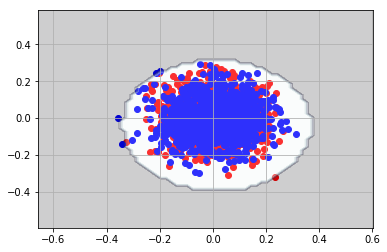

In [10]:
plt.scatter(xy_random[:, 0], xy_random[:, 1], color='red')
plt.scatter(xy_test[:, 0], xy_test[:, 1], color='blue')


plt.contourf(xx, yy, pred, cmap=plt.cm.bone, alpha=0.2)
plt.autoscale()
plt.grid()
plt.show()